In [1]:
import pandas as pd
import numpy as np
from backtest import Portfolio
import os

In [30]:
folder = '_results_ma_crossover'
assets = [asset for asset in os.listdir(folder) if '.' not in asset]

df_returns = []
df_performance = []

freq_group = 'W'

for asset in assets:
    if os.path.getsize(f'{folder}/{asset}/trades.csv') == 1:
        continue
    asset_trades = pd.read_csv(f'{folder}/{asset}/trades.csv')
    asset_trades.index = pd.to_datetime(asset_trades['ExitTime'].tolist())
    asset_returns = asset_trades.groupby(pd.Grouper(freq=freq_group))['ReturnPct'].apply(lambda x: (x + 1).prod() - 1)
    asset_returns.name = asset
    df_returns.append(asset_returns)

    asset_performance = pd.read_csv(f'{folder}/{asset}/performance.csv', index_col=0)
    df_performance.append(asset_performance)

df_returns = pd.concat(df_returns, axis=1)
df_performance = pd.concat(df_performance, axis=1).T
cols_perf_numeric = [col for col in df_performance if col not in ['Start', 'End', 'Duration']]
df_performance[cols_perf_numeric] = df_performance[cols_perf_numeric].astype(float).round(4)

In [31]:
df_returns.apply(lambda x: (x + 1).prod() - 1) * 100

ADA       219.330557
BTC       109.513406
FTM       503.342596
XRP       158.584912
DOT       -61.214238
SOL        74.889254
LINK      111.412852
UNI       -49.248400
ETH       122.568932
MATIC    1687.841823
dtype: float64

In [32]:
df_performance.T

,ADA,BTC,FTM,XRP,DOT,SOL,LINK,UNI,ETH,MATIC
Start,2019-05-11 19:00:00,2018-09-04 02:00:00,2020-07-02 07:00:00,2019-06-02 09:00:00,2021-09-01 20:00:00,2021-09-01 10:00:00,2020-02-01 12:00:00,2021-10-02 22:00:00,2018-09-04 01:00:00,2020-05-01 08:00:00
End,2024-01-31 10:00:00,2024-02-29 12:00:00,2023-12-27 15:00:00,2024-02-29 23:00:00,2024-02-24 01:00:00,2024-02-29 23:00:00,2024-01-31 23:00:00,2023-12-23 02:00:00,2024-02-29 09:00:00,2024-01-29 13:00:00
Duration,4Y 8M 3W 4D 15H,5Y 5M 4W 1D 10H,3Y 5M 4W 8H,4Y 9M 3D 14H,2Y 5M 3W 4D 5H,2Y 6M 1D 13H,4Y 11H,2Y 2M 3W 4H,5Y 5M 4W 1D 8H,3Y 9M 3D 5H
Exposure Time,0.2578,0.2369,0.2431,0.2228,0.2153,0.2834,0.2612,0.1834,0.2454,0.2378
Downside Exposure Time,0.0805,0.1189,0.0,0.0507,0.9964,0.292,0.0341,0.9916,0.1554,0.167
Returns,2.1933,1.0951,5.0334,1.5858,-0.6121,0.7489,1.1141,-0.4925,1.2257,16.8784
Total Returns,1.8001,1.0373,3.1064,1.7663,-0.8108,1.007,1.3633,-0.5245,1.2058,3.9462
Buy & Hold Returns,5.7012,7.6069,78.9522,0.3344,-0.7711,0.1089,4.6107,-0.7702,10.916,46.9246
Number Of Trades,973.0,594.0,649.0,794.0,307.0,366.0,646.0,317.0,850.0,687.0
Win Rate,0.3525,0.303,0.3128,0.3149,0.3225,0.3251,0.3529,0.3249,0.3271,0.3697


In [33]:
freq_pf = 52
pf = Portfolio(df_returns, frequency=freq_pf)

max_weight, min_weight, optimize = 0.2, 0.03, 'sharpe_ratio'
metrics_cla, weights_cla = pf.critical_line_algorithm(max_weight = max_weight, min_weight = min_weight, optimize = optimize)

/Users/omar/opt/anaconda3/envs/base1/lib/python3.11/site-packages/pypfopt/expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(


In [34]:
metrics_cla

Expected Annual Return    0.417041
Annual Volatility         0.264943
Sharpe ratio              1.498592
dtype: float64

In [35]:
weights_cla

,Weights,Returns
BTC,0.200000,0.219027
MATIC,0.200000,3.375684
ETH,0.160715,0.196986
FTM,0.148674,0.748339
XRP,0.091860,0.145675
LINK,0.060130,0.066993
ADA,0.048622,0.106642
DOT,0.030000,-0.018364
SOL,0.030000,0.022467
UNI,0.030000,-0.014775


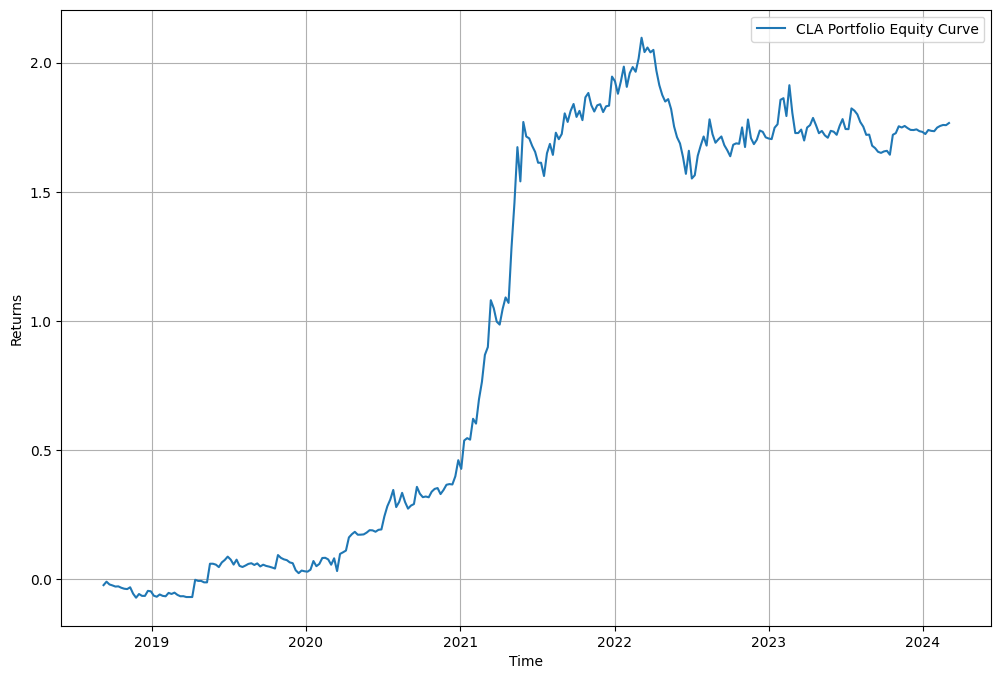

In [36]:
pf.plot_equity_curve(model = 'CLA', log_scale = True)

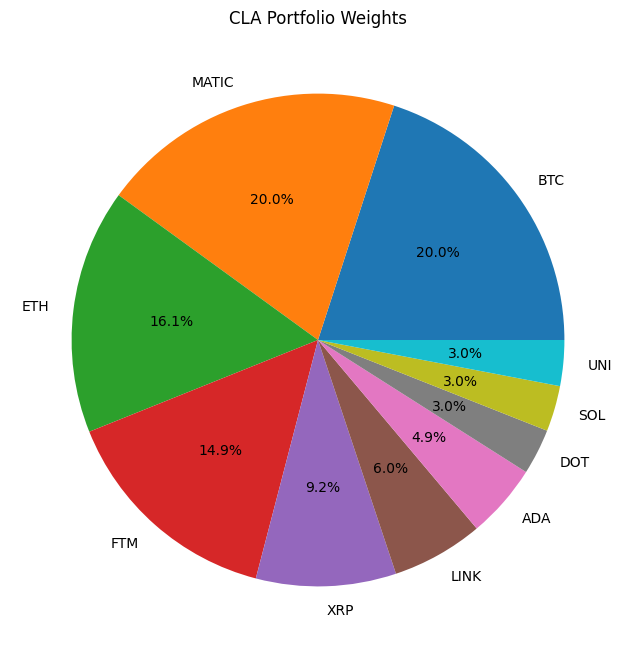

In [37]:
pf.plot_weights(model = 'CLA', weights = weights_cla['Weights'])

<Axes: >

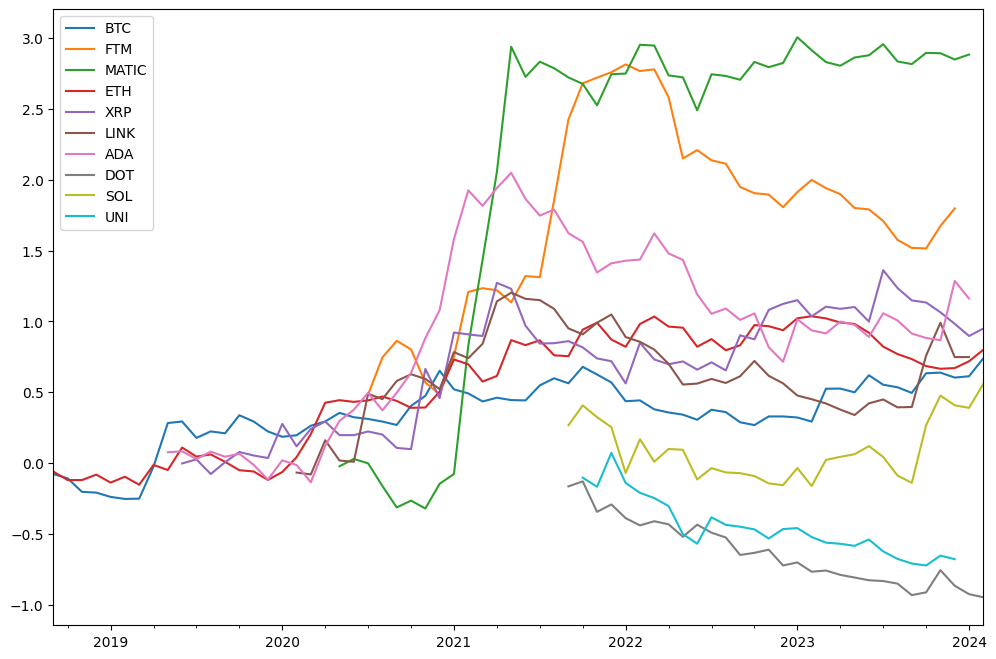

In [29]:
df_returns.loc[:, weights_cla.index].apply(lambda x: np.log((x+1).cumprod())).plot(figsize=(12,8))

In [11]:
folder = '_results_ml'
assets = [asset for asset in os.listdir(folder) if '.' not in asset]

df_returns = []
df_performance = []

freq_group = 'D'

for asset in assets:
    if os.path.getsize(f'{folder}/{asset}/trades.csv') == 1:
        continue
    asset_trades = pd.read_csv(f'{folder}/{asset}/trades.csv')
    asset_trades.index = pd.to_datetime(asset_trades['ExitTime'].tolist())
    asset_returns = asset_trades.groupby(pd.Grouper(freq=freq_group))['ReturnPct'].apply(lambda x: (x + 1).prod() - 1)
    asset_returns.name = asset
    df_returns.append(asset_returns)

    asset_performance = pd.read_csv(f'{folder}/{asset}/performance.csv', index_col=0)
    df_performance.append(asset_performance)

df_returns = pd.concat(df_returns, axis=1)
df_performance = pd.concat(df_performance, axis=1).T
cols_perf_numeric = [col for col in df_performance if col not in ['Start', 'End', 'Duration']]
df_performance[cols_perf_numeric] = df_performance[cols_perf_numeric].astype(float).round(4)

In [12]:
df_returns.apply(lambda x: (x + 1).prod() - 1) * 100

ADA      2603.297272
BTC      2024.075213
FTM      4086.940937
XRP      2131.492880
DOT       -84.826312
SOL        31.650882
LINK      691.292337
UNI       -80.924863
ETH      1074.834991
MATIC    4608.681223
dtype: float64

In [13]:
df_performance.T

,ADA,BTC,FTM,XRP,DOT,SOL,LINK,UNI,ETH,MATIC
Start,2019-04-22 00:00:00,2018-08-20 08:00:00,2020-06-15 16:00:00,2019-05-06 04:00:00,2021-08-23 04:00:00,2021-08-16 16:00:00,2020-01-20 04:00:00,2021-09-20 00:00:00,2018-08-20 08:00:00,2020-04-27 00:00:00
End,2024-03-17 16:00:00,2024-03-17 20:00:00,2024-03-17 20:00:00,2024-03-17 16:00:00,2024-03-17 16:00:00,2024-03-17 20:00:00,2024-03-17 16:00:00,2024-03-17 16:00:00,2024-03-17 20:00:00,2024-03-17 20:00:00
Duration,4Y 11M 1D 16H,5Y 7M 1D 12H,3Y 9M 6D 4H,4Y 10M 2W 3D 12H,2Y 6M 3W 6D 12H,2Y 7M 4D 4H,4Y 1M 4W 12H,2Y 5M 4W 1D 16H,5Y 7M 1D 12H,3Y 10M 3W 4D 20H
Exposure Time,0.475,0.5238,0.5331,0.4723,0.506,0.5786,0.5667,0.5244,0.5065,0.5701
Downside Exposure Time,0.0,0.0152,0.0048,0.1906,0.9852,0.7993,0.0023,0.9944,0.0713,0.0391
Returns,26.033,20.2408,40.8694,21.3149,-0.8483,0.3165,6.9129,-0.8092,10.7483,46.0868
Total Returns,4.4413,3.6416,6.2956,4.6451,-1.4226,1.1034,3.3804,-0.9312,3.3577,5.6887
Buy & Hold Returns,8.5747,9.6122,131.2946,1.1057,-0.6347,2.2087,6.1551,-0.4396,11.5338,68.4703
Number Of Trades,2343.0,2518.0,1924.0,2377.0,1414.0,1449.0,2336.0,1367.0,2692.0,1959.0
Win Rate,0.5045,0.5262,0.4922,0.5006,0.488,0.5135,0.5141,0.4887,0.5071,0.5028


In [14]:
freq_pf = 365
pf = Portfolio(df_returns, frequency=freq_pf)

max_weight, min_weight, optimize = 0.2, 0.03, 'sharpe_ratio'
metrics_cla, weights_cla = pf.critical_line_algorithm(max_weight = max_weight, min_weight = min_weight, optimize = optimize)

In [15]:
metrics_cla

Expected Annual Return    1.018727
Annual Volatility         0.347941
Sharpe ratio              2.870390
dtype: float64

In [16]:
weights_cla

,Weights,Returns
BTC,0.200000,4.048150
MATIC,0.200000,9.217362
FTM,0.190858,7.800260
ETH,0.130255,1.400023
XRP,0.105849,2.256163
ADA,0.053038,1.380742
DOT,0.030000,-0.025448
SOL,0.030000,0.009495
LINK,0.030000,0.207388
UNI,0.030000,-0.024277


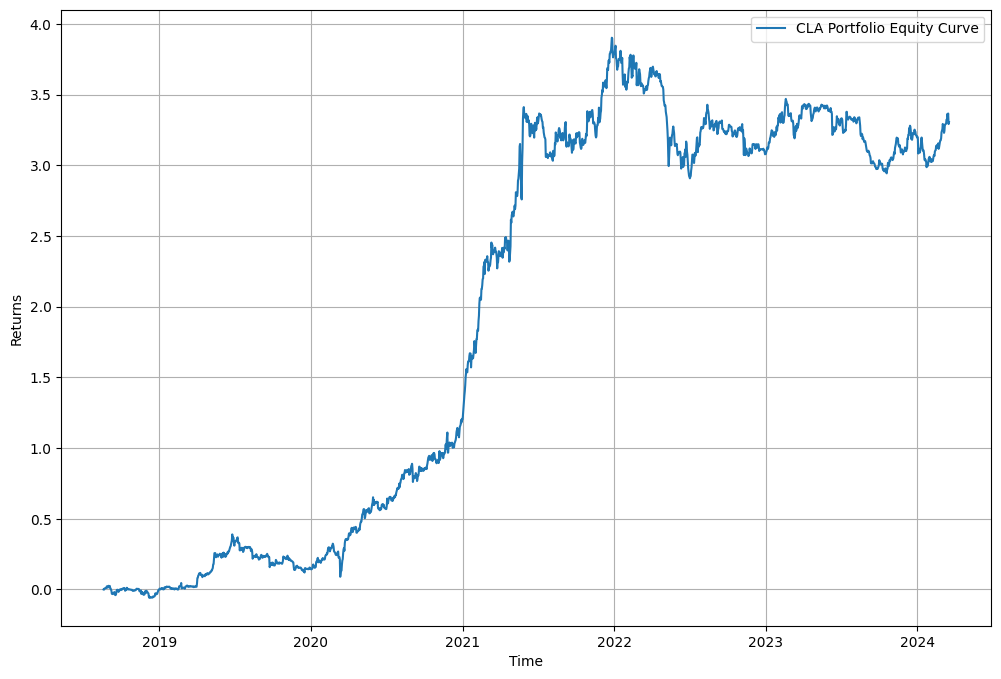

In [17]:
pf.plot_equity_curve(model = 'CLA', log_scale = True)

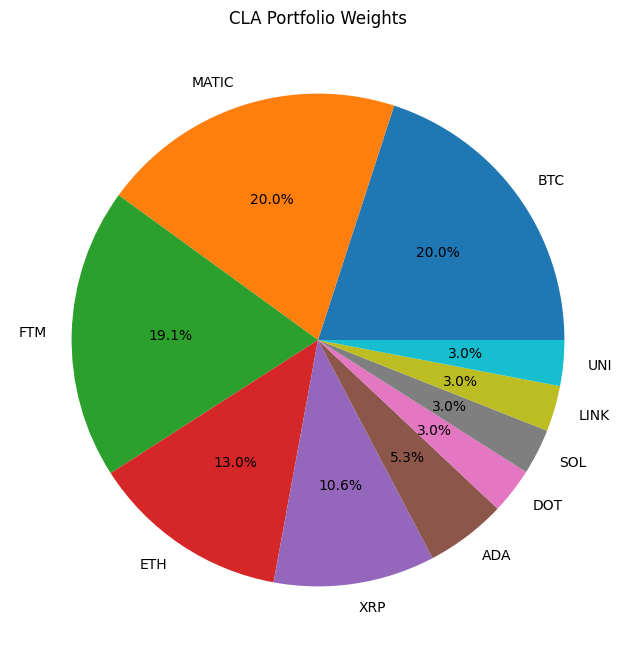

In [18]:
pf.plot_weights(model = 'CLA', weights = weights_cla['Weights'])

<Axes: >

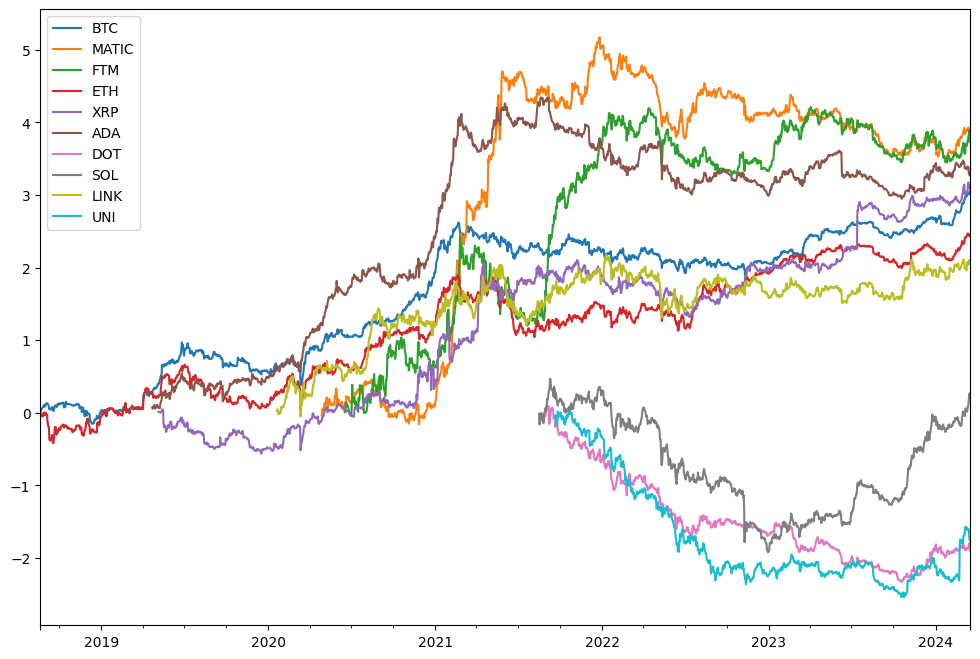

In [19]:
df_returns.loc[:, weights_cla.index].apply(lambda x: np.log((x+1).cumprod())).plot(figsize=(12,8))